### Analysis of Kaggle Titanic Dataset

Importing the necessary libraries

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
%matplotlib inline

Importing the dataset

In [405]:
data_train = pd.read_csv("C:\\Users\\User\\Downloads\\train.csv")

In [406]:
data_test = pd.read_csv("C:\\Users\\User\\Downloads\\test.csv")

In [407]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [408]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### EDA

In [409]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [411]:
df = data_train.iloc[:, 2:] 

In [412]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [413]:
y = data.iloc[:, 1:2] 

In [414]:
y = pd.DataFrame(y)

In [415]:
y.shape

(891, 1)

In [416]:
df.duplicated().sum()

0

In [417]:
y.value_counts()

Survived
0           549
1           342
dtype: int64

In [418]:
y.value_counts(normalize = True)

Survived
0           0.616162
1           0.383838
dtype: float64

<AxesSubplot:xlabel='Survived'>

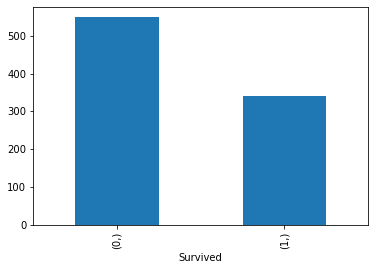

In [419]:
y.value_counts().plot(kind = 'bar')

In [420]:
import matplotlib.pyplot as plt

In [421]:
import seaborn as sns

In [422]:
df['Survived'] = y

In [423]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [424]:
df = df.drop('Name' , axis = 'columns')

In [425]:
data_test = data_test.drop('Name', axis = 'columns')

In [426]:
df = df.drop('Ticket', axis = 'columns')

In [427]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,3,male,22.0,1,0,7.2500,NaN,S,0
1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,female,26.0,0,0,7.9250,NaN,S,1
3,1,female,35.0,1,0,53.1000,C123,S,1
4,3,male,35.0,0,0,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S,0
887,1,female,19.0,0,0,30.0000,B42,S,1
888,3,female,NaN,1,2,23.4500,NaN,S,0
889,1,male,26.0,0,0,30.0000,C148,C,1


In [428]:
df = df.drop('Cabin', axis = 'columns')

In [429]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0
887,1,female,19.0,0,0,30.0000,S,1
888,3,female,NaN,1,2,23.4500,S,0
889,1,male,26.0,0,0,30.0000,C,1


In [430]:
from sklearn.preprocessing import LabelEncoder

In [431]:
label_encoder = LabelEncoder()

In [432]:
sex_label = label_encoder.fit_transform(df['Sex'])

In [433]:
df.drop('Sex', axis = 'columns')

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,1,0,7.2500,S,0
1,1,38.0,1,0,71.2833,C,1
2,3,26.0,0,0,7.9250,S,1
3,1,35.0,1,0,53.1000,S,1
4,3,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,S,0
887,1,19.0,0,0,30.0000,S,1
888,3,NaN,1,2,23.4500,S,0
889,1,26.0,0,0,30.0000,C,1


In [434]:
df['Sex'] = sex_label

In [435]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,S,0
1,1,0,38.0,1,0,71.2833,C,1
2,3,0,26.0,0,0,7.9250,S,1
3,1,0,35.0,1,0,53.1000,S,1
4,3,1,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,S,0
887,1,0,19.0,0,0,30.0000,S,1
888,3,0,NaN,1,2,23.4500,S,0
889,1,1,26.0,0,0,30.0000,C,1


In [436]:
embarked_label = label_encoder.fit_transform(df['Embarked'])

In [437]:
df.drop('Embarked', axis = 'columns')

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0
887,1,0,19.0,0,0,30.0000,1
888,3,0,NaN,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [438]:
df['Embarked'] = embarked_label

In [439]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,NaN,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


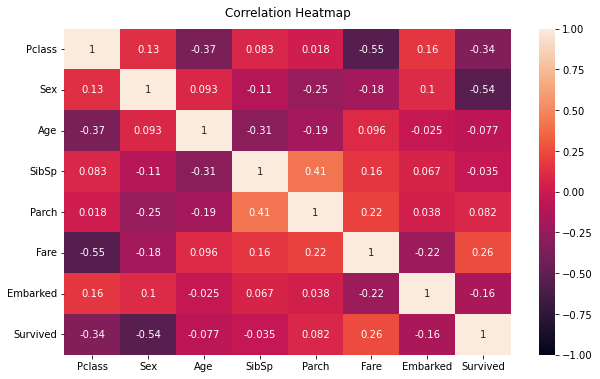

In [440]:
plt.figure(figsize = (10,6))
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 vmin=-1, vmax=1, annot=True)
hm.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

Here its observed that the relationship between Survived and Fare is high and the worst relationship is with Sex

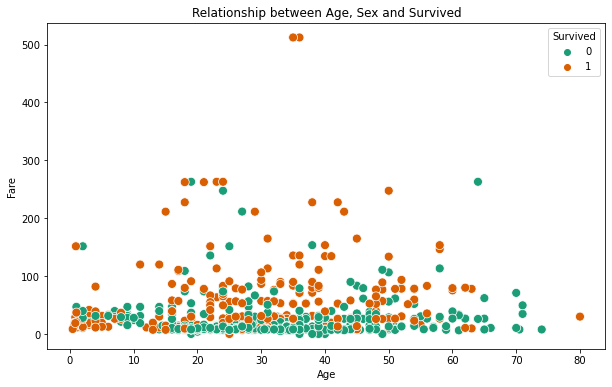

In [441]:
plt.figure(figsize = (10,6))
sns.scatterplot(x="Age", y="Fare", hue="Survived", data=df, palette="Dark2", s=80)
plt.title("Relationship between Age, Sex and Survived")
plt.show()

It can be seen that people with higher fare types were more likely to survive, also irrespective of fare, at ages lower than 10 there were more fatalaties

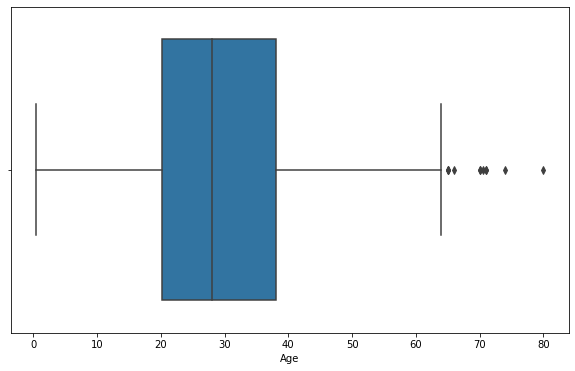

In [442]:
plt.figure(figsize = (10,6))
sns.boxplot(x=df["Age"])
plt.show()

In [443]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,0
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,NaN,1,2,23.4500,2,0
889,1,1,26.0,0,0,30.0000,0,1


In [444]:
X = df.iloc[:, :-1] 

In [445]:
X.shape

(891, 7)

In [446]:
y.shape

(891, 1)

In [447]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [448]:
from sklearn.impute import SimpleImputer

In [449]:
from sklearn.impute import IterativeImputer

In [450]:
simp_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [451]:
iter_imputer = IterativeImputer()

In [452]:
iter_imputer = iter_imputer.fit(X[['Age']])

In [453]:
X['Age'] = iter_imputer.transform(X[['Age']])

In [454]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [457]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [460]:
X_train = X
X_train.shape

(891, 7)

In [461]:
y_train = y
y_train.shape

(891, 1)

In [462]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,male,NaN,0,0,359309,8.0500,NaN,S


In [463]:
sex_label_test = label_encoder.fit_transform(data_test['Sex'])

In [489]:
embarked_label_test = label_encoder.fit_transform(data_test['Embarked'])

In [490]:
data_test['Embarked'] = embarked_label_test

In [464]:
data_test['Sex'] = sex_label_test

In [469]:
data_test = data_test.drop('Cabin', axis = 'columns')

In [470]:
data_test = data_test.drop('Ticket', axis = 'columns')

In [471]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,8.0500,S
414,1306,1,0,39.0,0,0,108.9000,C
415,1307,3,1,38.5,0,0,7.2500,S
416,1308,3,1,NaN,0,0,8.0500,S


In [472]:
iter_imputer = iter_imputer.fit(data_test[['Age']])

In [475]:
iter_imputer_fare = iter_imputer.fit(data_test[['Fare']])

In [473]:
data_test['Age'] = iter_imputer.transform(data_test[['Age']])

In [476]:
data_test['Fare'] = iter_imputer_fare.transform(data_test[['Fare']])

In [477]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [491]:
X_test = data_test.iloc[:,1:]

In [494]:
X_test.shape

(418, 7)

In [495]:
X_train.shape

(891, 7)

In [498]:
y_train.shape

(891, 1)

Making a pipeline

In [499]:
models = [LogisticRegression(random_state=1), 
          RandomForestClassifier(random_state=1),
          KNeighborsClassifier(n_neighbors = 5), 
          SVC(random_state=1), 
          SGDClassifier(), 
          DecisionTreeClassifier()]
results = []
f1scores = []
for m in models:
    pipeline = Pipeline([('impute', imputer),('scale', StandardScaler()), ('model', m)])
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    pipeline.fit(X_train, y_train.values.ravel())
    scores = pipeline.score(X_test, y_test)
    predicted_val = pipeline.predict(X_test)
    results.append(scores)
    f1scores.append(f1_scores)
for model, accuracy, f1 in zip(models, results, f1scores):
    print(f"Model: {model} >> Accuracy: {round(np.mean(accuracy), 4)}   |  F1 Score: {f1}")

ValueError: Found input variables with inconsistent numbers of samples: [891, 418]

Hyprerparameter tuning using GridSearchCV

In [350]:
param_grid_lr = {'penalty':['l1','l2','elasticnet','none'], 
                 'max_iter':[100,500,1000], 
                 'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
param_grid_rf = {'criterion':['gini','entropy','log_loss'], 
                 'min_samples_split':[2,4,8]}
k_range = list(range(1, 31))

param_grid_knn = param_grid = dict(n_neighbors=k_range)
param_grid_svc= {'C': [0.1,1, 10, 100, 1000], 
                 'gamma': [1,0.1,0.01,0.001,0.0001], 
                 'kernel': ['rbf']}
param_grid_sgd= {'loss':['hinge','log_loss','loss','modified_huber','squared_hinge','perceptron'], 
                 'penalty':['l2','l1','elasticnet'], 
                 'max_iter':[5,50,100,500,1000]}
param_grid_dt = {'max_depth':[10,20,30,40,50],
                 'criterion':['gini','entropy','log_loss']}

In [351]:
param_grid = [{'penalty':['l1','l2','elasticnet','none'], 
               'max_iter':[100,500,1000], 
               'solver':['newton-cg','lbfgs','liblinear','sag','saga']},
             {'criterion':['gini','entropy','log_loss'], 
              'min_samples_split':[2,4,8]},
             {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf']},
             {'loss':['hinge','log_loss','loss','modified_huber','squared_hinge','perceptron'], 
              'penalty':['l2','l1','elasticnet'], 
              'max_iter':[5,50,100,500,1000]},
             {'max_depth':[10,20,30,40,50],
              'criterion':['gini','entropy','log_loss']}]

model = [LogisticRegression(), RandomForestClassifier(), SVC(), SGDClassifier(), DecisionTreeClassifier()]
abrv = ['lr','rf','svc','sgd','dt']
best_params=[]
best_estimator=[]

for a, m, param_grid in zip(abrv, model, param_grid):
    grid = GridSearchCV(m,param_grid,refit=True,verbose=3)
    grid.fit(X_train, y_train.values.ravel())
    best_params.append(grid.best_params_)
    best_estimator.append(grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l1, solver=liblinear;, score=0.724 total time=   0.0s

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=100, penalty=l1, solver=saga;, score=0.724 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l1, solver=saga;, score=0.649 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l1, solver=saga;, score=0.724 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l1, solver=saga;, score=0.677 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l1, solver=saga;, score=0.714 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l2, solver=newton-cg;, score=0.858 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l2, solver=newton-cg;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l2, solver=lbfg

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 2/5] END max_iter=100, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l2, solver=liblinear;, score=0.896 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l2, solver=liblinear;, score=0.820 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l2, solver=liblinear;, score=0.789 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=l2, solver=sag;, score=0.724 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l2, solver=sag;, score=0.687 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l2, solver=sag;, score=0.692 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l2, solver=sag;, score=0.699 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 1/5] END max_iter=100, penalty=l2, solver=saga;, score=0.724 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=l2, solver=saga;, score=0.657 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=l2, solver=saga;, score=0.724 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=l2, solver=saga;, score=0.677 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=l2, solver=saga;, score=0.714 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END m

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=100, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=elasticnet, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=elasticnet, solver=sag;, score=nan total ti

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[CV 4/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=none, solver=lbfgs;, score=0.774 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END max_iter=100, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END max_iter=100, penalty=none, solver=sag;, score=0.724 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=none, solver=sag;, score=0.687 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=none, solver=sag;, score=0.739 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

[CV 4/5] END max_iter=100, penalty=none, solver=sag;, score=0.692 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=none, solver=sag;, score=0.699 total time=   0.0s
[CV 1/5] END max_iter=100, penalty=none, solver=saga;, score=0.716 total time=   0.0s
[CV 2/5] END max_iter=100, penalty=none, solver=saga;, score=0.657 total time=   0.0s
[CV 3/5] END max_iter=100, penalty=none, solver=saga;, score=0.724 total time=   0.0s
[CV 4/5] END max_iter=100, penalty=none, solver=saga;, score=0.677 total time=   0.0s
[CV 5/5] END max_iter=100, penalty=none, solver=saga;, score=0.714 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l1, solver=liblinear;, score=0.724 total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l1, solver=liblinear;, sco

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=500, penalty=l1, solver=saga;, score=0.716 total time=   0.1s
[CV 2/5] END max_iter=500, penalty=l1, solver=saga;, score=0.672 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=500, penalty=l1, solver=saga;, score=0.739 total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l1, solver=saga;, score=0.692 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=500, penalty=l1, solver=saga;, score=0.722 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END max_iter=500, penalty=l2, solver=newton-cg;, score=0.858 total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l2, solver=newton-cg;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END max_iter=500, penalty=l2, solver=lbfgs;, score=0.858 total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l2, solver=lbfgs;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=500, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l2, solver=

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=500, penalty=l2, solver=sag;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=500, penalty=l2, solver=sag;, score=0.709 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=500, penalty=l2, solver=sag;, score=0.739 total time=   0.0s
[CV 4/5] END max_iter=500, penalty=l2, solver=sag;, score=0.692 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=500, penalty=l2, solver=sag;, score=0.737 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=l2, solver=saga;, score=0.716 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=500, penalty=l2, solver=saga;, score=0.672 total time=   0.0s
[CV 3/5] END max_iter=500, penalty=l2, solver=saga;, score=0.739 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=500, penalty=l2, solver=saga;, score=0.692 total time=   0.0s
[CV 5/5] END max_iter=500, penalty=l2, solver=saga;, score=0.722 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=500, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time= 

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=500, penalty=none, solver=sag;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=500, penalty=none, solver=sag;, score=0.709 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=500, penalty=none, solver=sag;, score=0.739 total time=   0.0s
[CV 4/5] END max_iter=500, penalty=none, solver=sag;, score=0.692 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=500, penalty=none, solver=sag;, score=0.737 total time=   0.0s
[CV 1/5] END max_iter=500, penalty=none, solver=saga;, score=0.716 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=500, penalty=none, solver=saga;, score=0.672 total time=   0.0s
[CV 3/5] END max_iter=500, penalty=none, solver=saga;, score=0.739 total time=   0.0s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=500, penalty=none, solver=saga;, score=0.692 total time=   0.0s
[CV 5/5] END max_iter=500, penalty=none, solver=saga;, score=0.722 total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l1, solver=lbfgs

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=1000, penalty=l1, solver=saga;, score=0.731 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=1000, penalty=l1, solver=saga;, score=0.716 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=1000, penalty=l1, solver=saga;, score=0.739 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=1000, penalty=l1, solver=saga;, score=0.692 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=1000, penalty=l1, solver=saga;, score=0.737 total time=   0.2s
[CV 1/5] END max_iter=1000, penalty=l2, solver=newton-cg;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l2, solver=newton-cg;, score=0.799 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l2, solver=newton-cg;, score=0.858 total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l2, solver=newton-cg;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=l2, solver=lbfgs;, score=0.731 total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=l2, solver=lbfgs;, score=0.799 total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=l2, solver=lbfgs;, score=0.858 total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=l2, solver=lbfgs;, score=0.827 total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 1/5] END max_iter=1000, penalty

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=1000, penalty=l2, solver=sag;, score=0.724 total time=   0.1s
[CV 2/5] END max_iter=1000, penalty=l2, solver=sag;, score=0.761 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=1000, penalty=l2, solver=sag;, score=0.769 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=1000, penalty=l2, solver=sag;, score=0.714 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=1000, penalty=l2, solver=sag;, score=0.752 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.731 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.709 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.739 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.692 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=1000, penalty=l2, solver=saga;, score=0.737 total time=   0.2s
[CV 1/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=elasticnet, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END max_iter=1000, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END max_iter=1000, penalty=elasticnet, solver=lbfgs;, scor

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=1000, penalty=none, solver=sag;, score=0.724 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=1000, penalty=none, solver=sag;, score=0.776 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=1000, penalty=none, solver=sag;, score=0.769 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=1000, penalty=none, solver=sag;, score=0.714 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END max_iter=1000, penalty=none, solver=sag;, score=0.752 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END max_iter=1000, penalty=none, solver=saga;, score=0.731 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END max_iter=1000, penalty=none, solver=saga;, score=0.709 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END max_iter=1000, penalty=none, solver=saga;, score=0.739 total time=   0.2s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END max_iter=1000, penalty=none, solver=saga;, score=0.692 total time=   0.1s


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(se

[CV 5/5] END max_iter=1000, penalty=none, solver=saga;, score=0.737 total time=   0.2s
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END criterion=gini, min_samples_split=2;, score=0.754 total time=   0.3s
[CV 2/5] END criterion=gini, min_samples_split=2;, score=0.806 total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_split=2;, score=0.821 total time=   0.3s
[CV 4/5] END criterion=gini, min_samples_split=2;, score=0.812 total time=   0.3s
[CV 5/5] END criterion=gini, min_samples_split=2;, score=0.842 total time=   0.3s
[CV 1/5] END criterion=gini, min_samples_split=4;, score=0.799 total time=   0.3s
[CV 2/5] END criterion=gini, min_samples_split=4;, score=0.821 total time=   0.3s
[CV 3/5] END criterion=gini, min_samples_split=4;, score=0.858 total time=   0.3s
[CV 4/5] END criterion=gini, min_samples_split=4;, score=0.850 total time=   0.3s
[CV 5/5] END criterion=gini, min_samples_split=4;, score=0.865 total time=   0.3s
[CV 1/5] END criterion=gini, min_

[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.692 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.709 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.679 total time=   0.0s
[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.739 total time=   0.0s
[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.692 total time=   0.0s
[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.746 total time=   0.0s
[CV 2/5] END .....C=10, gamm

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 1/5] END loss=hinge, max_iter=5, penalty=l1;, score=0.679 total time=   0.0s
[CV 2/5] END loss=hinge, max_iter=5, penalty=l1;, score=0.627 total time=   0.0s
[CV 3/5] END loss=hinge, max_iter=5, penalty=l1;, score=0.754 total time=   0.0s
[CV 4/5] END loss=hinge, max_iter=5, penalty=l1;, score=0.707 total time=   0.0s
[CV 5/5] END loss=hinge, max_iter=5, penalty=l1;, score=0.684 total time=   0.0s
[CV 1/5] END loss=hinge, max_iter=5, penalty=elasticnet;, score=0.679 total time=   0.0s
[CV 2/5] END loss=hinge, max_iter=5, penalty=elasticnet;, score=0.627 total time=   0.0s
[CV 3/5] END loss=hinge, max_iter=5, penalty=elasticnet;, score=0.627 total time=   0.0s
[CV 4/5] END loss=hinge, max_iter=5, penalty=elasticnet;, score=0.707 total time=   0.0s
[CV 5/5] END loss=hinge, max_iter=5, penalty=elasticnet;, score=0.632 total time=   0.0s
[CV 1/5] END loss=hinge, max_iter=50, penalty=l2;, score=0.701 total time=   0.0s
[CV 2/5] END loss=hinge, max_iter=50, penalty=l2;, score=0.709 total

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END loss=hinge, max_iter=100, penalty=l1;, score=0.724 total time=   0.0s
[CV 3/5] END loss=hinge, max_iter=100, penalty=l1;, score=0.746 total time=   0.0s
[CV 4/5] END loss=hinge, max_iter=100, penalty=l1;, score=0.782 total time=   0.0s
[CV 5/5] END loss=hinge, max_iter=100, penalty=l1;, score=0.684 total time=   0.0s
[CV 1/5] END loss=hinge, max_iter=100, penalty=elasticnet;, score=0.679 total time=   0.0s
[CV 2/5] END loss=hinge, max_iter=100, penalty=elasticnet;, score=0.754 total time=   0.0s
[CV 3/5] END loss=hinge, max_iter=100, penalty=elasticnet;, score=0.739 total time=   0.0s
[CV 4/5] END loss=hinge, max_iter=100, penalty=elasticnet;, score=0.699 total time=   0.0s
[CV 5/5] END loss=hinge, max_iter=100, penalty=elasticnet;, score=0.722 total time=   0.0s
[CV 1/5] END loss=hinge, max_iter=500, penalty=l2;, score=0.716 total time=   0.0s
[CV 2/5] END loss=hinge, max_iter=500, penalty=l2;, score=0.657 total time=   0.0s
[CV 3/5] END loss=hinge, max_iter=500, penalty=

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 5/5] END loss=log_loss, max_iter=5, penalty=l2;, score=0.632 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=5, penalty=l1;, score=0.664 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=5, penalty=l1;, score=0.694 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=5, penalty=l1;, score=0.627 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=5, penalty=l1;, score=0.414 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=5, penalty=l1;, score=0.398 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=5, penalty=elasticnet;, score=0.634 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=5, penalty=elasticnet;, score=0.627 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=5, penalty=elasticnet;, score=0.627 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=5, penalty=elasticnet;, score=0.684 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=5, penalty=elasticnet;, score=0.759 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END loss=log_loss, max_iter=50, penalty=l2;, score=0.647 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=50, penalty=l1;, score=0.739 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=50, penalty=l1;, score=0.776 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=50, penalty=l1;, score=0.739 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=50, penalty=l1;, score=0.729 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=50, penalty=l1;, score=0.699 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=50, penalty=elasticnet;, score=0.724 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=50, penalty=elasticnet;, score=0.373 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=50, penalty=elasticnet;, score=0.843 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=50, penalty=elasticnet;, score=0.692 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=50, penalty=elasticnet;, score=0.789 total time=   0.0s
[CV 1/5] END loss=log_los

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END loss=log_loss, max_iter=100, penalty=l2;, score=0.649 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=100, penalty=l2;, score=0.739 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=100, penalty=l2;, score=0.662 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=100, penalty=l2;, score=0.797 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=100, penalty=l1;, score=0.448 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=100, penalty=l1;, score=0.403 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=100, penalty=l1;, score=0.858 total time=   0.0s
[CV 4/5] END loss=log_loss, max_iter=100, penalty=l1;, score=0.639 total time=   0.0s
[CV 5/5] END loss=log_loss, max_iter=100, penalty=l1;, score=0.737 total time=   0.0s
[CV 1/5] END loss=log_loss, max_iter=100, penalty=elasticnet;, score=0.634 total time=   0.0s
[CV 2/5] END loss=log_loss, max_iter=100, penalty=elasticnet;, score=0.716 total time=   0.0s
[CV 3/5] END loss=log_loss, max_iter=1

[CV 2/5] END loss=loss, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END loss=loss, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END loss=loss, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END loss=loss, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END loss=loss, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END loss=loss, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 3/5] END loss=loss, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 4/5] END loss=loss, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 5/5] END loss=loss, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 1/5] END loss=modified_huber, max_iter=5, penalty=l2;, score=0.739 total time=   0.0s
[CV 2/5] END loss=modified_huber, max_iter=5, penalty=l2;, score=0.381 total time=   0.0s
[CV 3/5] END loss=modified_huber, max_iter=5, penal

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 4/5] END loss=modified_huber, max_iter=5, penalty=elasticnet;, score=0.729 total time=   0.0s
[CV 5/5] END loss=modified_huber, max_iter=5, penalty=elasticnet;, score=0.414 total time=   0.0s
[CV 1/5] END loss=modified_huber, max_iter=50, penalty=l2;, score=0.709 total time=   0.0s
[CV 2/5] END loss=modified_huber, max_iter=50, penalty=l2;, score=0.694 total time=   0.0s
[CV 3/5] END loss=modified_huber, max_iter=50, penalty=l2;, score=0.866 total time=   0.0s
[CV 4/5] END loss=modified_huber, max_iter=50, penalty=l2;, score=0.677 total time=   0.0s
[CV 5/5] END loss=modified_huber, max_iter=50, penalty=l2;, score=0.774 total time=   0.0s
[CV 1/5] END loss=modified_huber, max_iter=50, penalty=l1;, score=0.366 total time=   0.0s
[CV 2/5] END loss=modified_huber, max_iter=50, penalty=l1;, score=0.455 total time=   0.0s
[CV 3/5] END loss=modified_huber, max_iter=50, penalty=l1;, score=0.687 total time=   0.0s
[CV 4/5] END loss=modified_huber, max_iter=50, penalty=l1;, score=0.759 tota

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 4/5] END loss=modified_huber, max_iter=50, penalty=elasticnet;, score=0.617 total time=   0.0s
[CV 5/5] END loss=modified_huber, max_iter=50, penalty=elasticnet;, score=0.774 total time=   0.0s
[CV 1/5] END loss=modified_huber, max_iter=100, penalty=l2;, score=0.701 total time=   0.0s
[CV 2/5] END loss=modified_huber, max_iter=100, penalty=l2;, score=0.709 total time=   0.0s
[CV 3/5] END loss=modified_huber, max_iter=100, penalty=l2;, score=0.881 total time=   0.0s
[CV 4/5] END loss=modified_huber, max_iter=100, penalty=l2;, score=0.782 total time=   0.0s
[CV 5/5] END loss=modified_huber, max_iter=100, penalty=l2;, score=0.759 total time=   0.0s
[CV 1/5] END loss=modified_huber, max_iter=100, penalty=l1;, score=0.754 total time=   0.0s
[CV 2/5] END loss=modified_huber, max_iter=100, penalty=l1;, score=0.754 total time=   0.0s
[CV 3/5] END loss=modified_huber, max_iter=100, penalty=l1;, score=0.881 total time=   0.0s
[CV 4/5] END loss=modified_huber, max_iter=100, penalty=l1;, score

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 5/5] END loss=squared_hinge, max_iter=5, penalty=l1;, score=0.774 total time=   0.0s
[CV 1/5] END loss=squared_hinge, max_iter=5, penalty=elasticnet;, score=0.687 total time=   0.0s
[CV 2/5] END loss=squared_hinge, max_iter=5, penalty=elasticnet;, score=0.709 total time=   0.0s
[CV 3/5] END loss=squared_hinge, max_iter=5, penalty=elasticnet;, score=0.575 total time=   0.0s
[CV 4/5] END loss=squared_hinge, max_iter=5, penalty=elasticnet;, score=0.624 total time=   0.0s
[CV 5/5] END loss=squared_hinge, max_iter=5, penalty=elasticnet;, score=0.692 total time=   0.0s
[CV 1/5] END loss=squared_hinge, max_iter=50, penalty=l2;, score=0.687 total time=   0.0s
[CV 2/5] END loss=squared_hinge, max_iter=50, penalty=l2;, score=0.701 total time=   0.0s
[CV 3/5] END loss=squared_hinge, max_iter=50, penalty=l2;, score=0.627 total time=   0.0s
[CV 4/5] END loss=squared_hinge, max_iter=50, penalty=l2;, score=0.714 total time=   0.0s
[CV 5/5] END loss=squared_hinge, max_iter=50, penalty=l2;, score=0

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_

[CV 3/5] END loss=perceptron, max_iter=5, penalty=elasticnet;, score=0.627 total time=   0.0s
[CV 4/5] END loss=perceptron, max_iter=5, penalty=elasticnet;, score=0.383 total time=   0.0s
[CV 5/5] END loss=perceptron, max_iter=5, penalty=elasticnet;, score=0.376 total time=   0.0s
[CV 1/5] END loss=perceptron, max_iter=50, penalty=l2;, score=0.701 total time=   0.0s
[CV 2/5] END loss=perceptron, max_iter=50, penalty=l2;, score=0.612 total time=   0.0s
[CV 3/5] END loss=perceptron, max_iter=50, penalty=l2;, score=0.799 total time=   0.0s
[CV 4/5] END loss=perceptron, max_iter=50, penalty=l2;, score=0.624 total time=   0.0s
[CV 5/5] END loss=perceptron, max_iter=50, penalty=l2;, score=0.774 total time=   0.0s
[CV 1/5] END loss=perceptron, max_iter=50, penalty=l1;, score=0.672 total time=   0.0s
[CV 2/5] END loss=perceptron, max_iter=50, penalty=l1;, score=0.716 total time=   0.0s
[CV 3/5] END loss=perceptron, max_iter=50, penalty=l1;, score=0.687 total time=   0.0s
[CV 4/5] END loss=perc

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 890, in fit
    return self._fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 658, in _fit
    self._validate_params()
  File "C:\Users\User\anaconda3\

[CV 2/5] END ......criterion=gini, max_depth=20;, score=0.769 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=20;, score=0.828 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=20;, score=0.759 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=20;, score=0.752 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=30;, score=0.761 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=30;, score=0.784 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=30;, score=0.828 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=30;, score=0.759 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=30;, score=0.759 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=40;, score=0.746 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=40;, score=0.776 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=40;, score=0.836 total time=   0.0s
[CV 4/5] END ......criterion

In [352]:
for a, p, e in zip(abrv,best_params,best_estimator):
    print(f"""Model : {a.upper()}
                        Best Parameter : {p}
                        Best Estimator : {e} \n""")

Model : LR
                        Best Parameter : {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
                        Best Estimator : LogisticRegression(solver='liblinear') 

Model : RF
                        Best Parameter : {'criterion': 'gini', 'min_samples_split': 4}
                        Best Estimator : RandomForestClassifier(min_samples_split=4) 

Model : SVC
                        Best Parameter : {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
                        Best Estimator : SVC(C=1000, gamma=0.0001) 

Model : SGD
                        Best Parameter : {'loss': 'modified_huber', 'max_iter': 100, 'penalty': 'l1'}
                        Best Estimator : SGDClassifier(loss='modified_huber', max_iter=100, penalty='l1') 

Model : DT
                        Best Parameter : {'criterion': 'log_loss', 'max_depth': 10}
                        Best Estimator : DecisionTreeClassifier(criterion='log_loss', max_depth=10) 



In [500]:
best_model_lr = LogisticRegression(max_iter= 100, penalty = 'l2', solver = 'liblinear', random_state= 1)

In [501]:
best_clf_lr = best_model_lr.fit(X_train, y_train.values.ravel())

In [504]:
best_clf_lr.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [505]:
best_model_rf = RandomForestClassifier(criterion= 'log_loss', min_samples_split = 8, random_state= 1)

In [506]:
best_clf_rf = best_model_rf.fit(X_train, y_train.values.ravel())

In [507]:
best_clf_rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [511]:
best_model_sgd = SGDClassifier(loss= 'hinge', max_iter = 100, penalty = 'l1', random_state= 1)

In [512]:
best_clf_sgd = best_model_sgd.fit(X_train, y_train.values.ravel())

In [514]:
best_clf_sgd.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [528]:
data_test['Survived'] = best_clf_lr.predict(X_test)

In [537]:
data_test['Survived'] = best_clf_rf.predict(X_test)

In [534]:
data_test['Survived'] = best_clf_sgd.predict(X_test)

In [538]:
data_test[['PassengerId', 'Survived']].to_csv('rf_submission.csv', index = False)

In [530]:
pwd

'C:\\Users\\User\\Downloads\\kaggle'

In [536]:
data_test.drop('Survived', axis = 'columns')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Linear_Prediction,RF_prediction,SGD_prediction
0,892,3,1,34.50000,0,0,7.8292,1,0,0,0
1,893,3,0,47.00000,1,0,7.0000,2,0,0,1
2,894,2,1,62.00000,0,0,9.6875,1,0,0,0
3,895,3,1,27.00000,0,0,8.6625,2,0,0,0
4,896,3,0,22.00000,1,1,12.2875,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,2,0,0,0
414,1306,1,0,39.00000,0,0,108.9000,0,1,1,1
415,1307,3,1,38.50000,0,0,7.2500,2,0,0,0
416,1308,3,1,30.27259,0,0,8.0500,2,0,0,0
